### Igraph experiments

In [3]:
import igraph as ig
import leidenalg as la
import networkx as nx

In [2]:
def leiden(g, weights=None):
    return la.find_partition(g, n_iterations=-1, partition_type=la.ModularityVertexPartition,
                            weights=weights)

In [3]:
edges = [
        (0, 1, 20), (0, 3, 1), (0, 4, 1),
        (1, 2, 1), (1, 4, 1), (1, 5, 1),
        (2, 3, 20), (2, 4, 20), (2, 8, 1), 
        (3, 4, 20),
        (5, 6, 20), (5, 7, 1), (5, 8, 1),
        (6, 7, 1), (6, 8, 1),
        (7, 8, 20)
]

In [4]:
g = ig.Graph.TupleList(edges, directed=False, weights=True)

In [5]:
g.vs['name'] = [str(name) for name in g.vs['name']]
g.vs['label'] = [str(name) for name in g.vs['name']]

In [6]:
g.es['label'] = g.es['weight']

In [7]:
print(g)

IGRAPH UNW- 9 16 --
+ attr: label (v), name (v), label (e), weight (e)
+ edges (vertex names):
0 -- 1, 3, 4      3 -- 0, 4, 2      2 -- 1, 3, 4, 8   8 -- 2, 5, 6, 7   7 --
5, 8, 6
1 -- 0, 4, 2, 5   4 -- 0, 1, 3, 2   5 -- 1, 8, 6, 7   6 -- 5, 8, 7


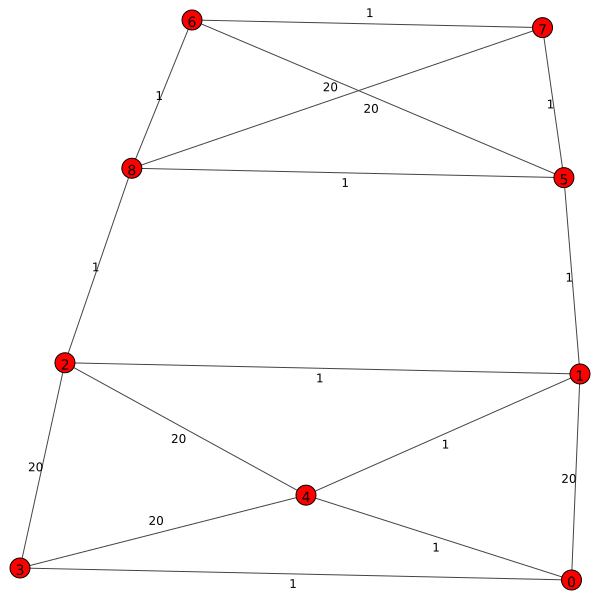

In [8]:
ig.plot(g)

----

In [9]:
part = leiden(g)

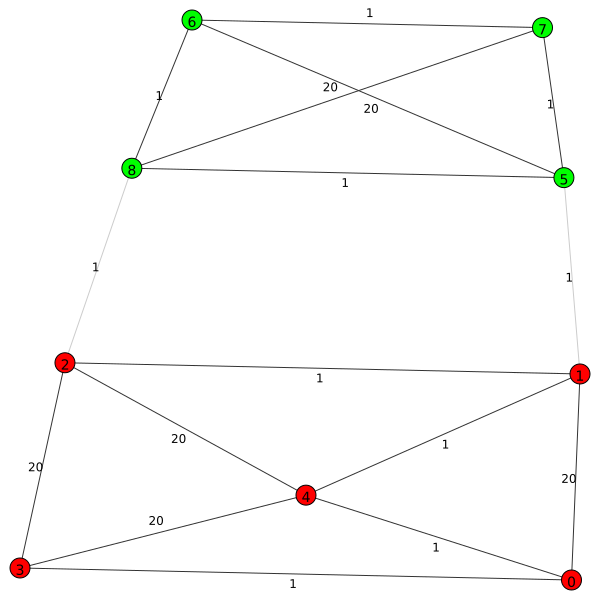

In [10]:
ig.plot(part)

In [11]:
# add edge weights
# compare clustering before and after adding weights

In [12]:
part = leiden(g, weights='weight')

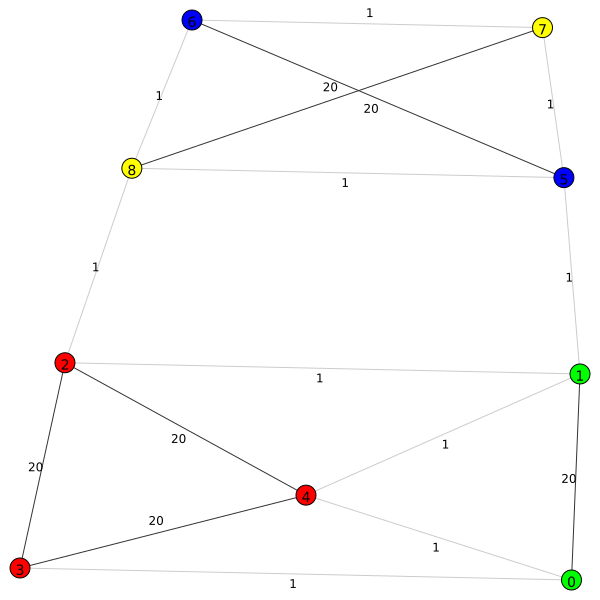

In [13]:
ig.plot(part)

### now do the hierarchical clustering in iGraph

In [14]:
karate_g = ig.Graph.Famous('Zachary')

In [15]:
karate_g.vs['name'] = [str(i) for i in range(karate_g.vcount())]
karate_g.vs['label'] = [str(name) for name in karate_g.vs['name']]

In [16]:
print(karate_g)

IGRAPH UN-- 34 78 --
+ attr: label (v), name (v)
+ edges (vertex names):
 0 -- 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31             31 --
0, 24, 25, 28, 32, 33
 1 -- 0, 2, 3, 7, 13, 17, 19, 21, 30                                     32 --
2, 8, 14, 15, 18, 20, 22, 23, 29, 30, 31, 33
 2 -- 0, 1, 3, 7, 8, 9, 13, 27, 28, 32                                   33 --
8, 9, 13, 14, 15, 18, 19, 20, 22, 23, 26, 27, 28, 29, 30, 31, 32
 3 -- 0, 1, 2, 7, 12, 13
 4 -- 0, 6, 10
 5 -- 0, 6, 10, 16
 6 -- 0, 4, 5, 16
 7 -- 0, 1, 2, 3
 8 -- 0, 2, 30, 32, 33
 9 -- 2, 33
10 -- 0, 4, 5
11 -- 0
12 -- 0, 3
13 -- 0, 1, 2, 3, 33
14 -- 32, 33
15 -- 32, 33
16 -- 5, 6
17 -- 0, 1
18 -- 32, 33
19 -- 0, 1, 33
20 -- 32, 33
21 -- 0, 1
22 -- 32, 33
23 -- 25, 27, 29, 32, 33
24 -- 25, 27, 31
25 -- 23, 24, 31
26 -- 29, 33
27 -- 2, 23, 24, 33
28 -- 2, 31, 33
29 -- 23, 26, 32, 33
30 -- 1, 8, 32, 33


In [17]:
part = leiden(karate_g)

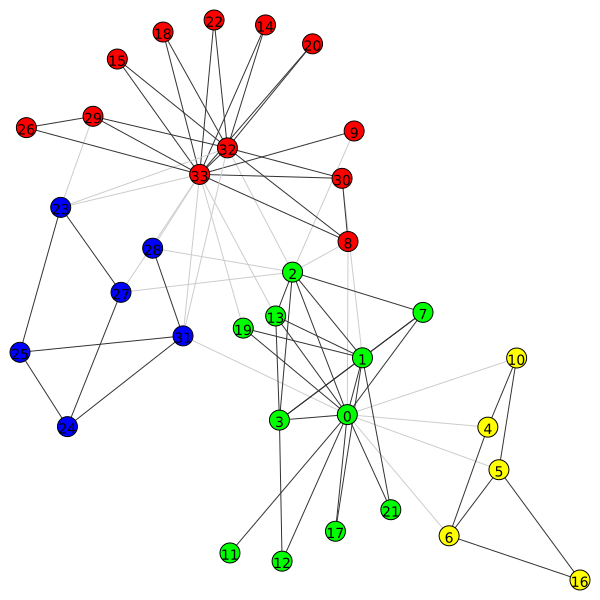

In [18]:
ig.plot(part)

In [53]:
def get_tree(g, method='leiden', weights=None):
    tree = []

    if g.vcount() < 2:
        clusters = [[int(n['name'])] for n in g.vs()]
        return clusters
    
    if method == 'leiden':
        clusters = g.community_leiden(weights=weights)
    elif method == 'louvain':
        clusters = g.community_louvain(weights=weights)
    elif method == 'labelprop':
        clusters = g.community_label_propagation(weights=weights)
    elif method == 'infomap':
        clusters = g.community_infomap(edge_weights=weights)
    else:
        raise NotImplementedError(f'Improper method: {method}')
        
    if len(clusters) == 1:
        sg = clusters.subgraphs()[0]
        clusters = [[int(n['name'])] for n in sg.vs()]
        return clusters

    for sg in clusters.subgraphs():
        tree.append(get_tree(sg, weights=weights))

    return tree

In [60]:
karate_tree = get_tree(karate_g, method='labelprop')

In [61]:
karate_tree

[[[[0]],
  [[1]],
  [[2]],
  [[3]],
  [[7]],
  [[9]],
  [[11]],
  [[12]],
  [[13]],
  [[17]],
  [[19]],
  [[21]]],
 [[[4]], [[5]], [[6]], [[10]], [[16]]],
 [[[8]],
  [[14]],
  [[15]],
  [[18]],
  [[20]],
  [[22]],
  [[23]],
  [[24]],
  [[25]],
  [[26]],
  [[27]],
  [[28]],
  [[29]],
  [[30]],
  [[31]],
  [[32]],
  [[33]]]]

In [ ]:
part = karate_g.community_leiden(objective_function='modularity', weights=None, n_iterations=-1)

In [ ]:
ig.plot(part)

In [24]:
part = karate_g.community_label_propagation()  # works
part = karate_g.community_infomap()  # works
part = karate_g.community_leiden()  # doesn't work
part = karate_g.community_

In [27]:
wts = [1] * karate_g.ecount()
karate_g.es['weight'] = wts

In [40]:
# part = g.community_infomap(edge_weights='weight')
part = g.community_leiden(weights='weight')
part = g.community_louvain(weights='weight')
part = g.community_label_propagation(weights='weight')
g.community_infomap(edge_weights='weights')

AttributeError: 'Graph' object has no attribute 'community_louvain'

In [51]:
g.community_infomap(edge_weights='weights')

In [48]:
part = g.community_label_propagation(weights='weight')

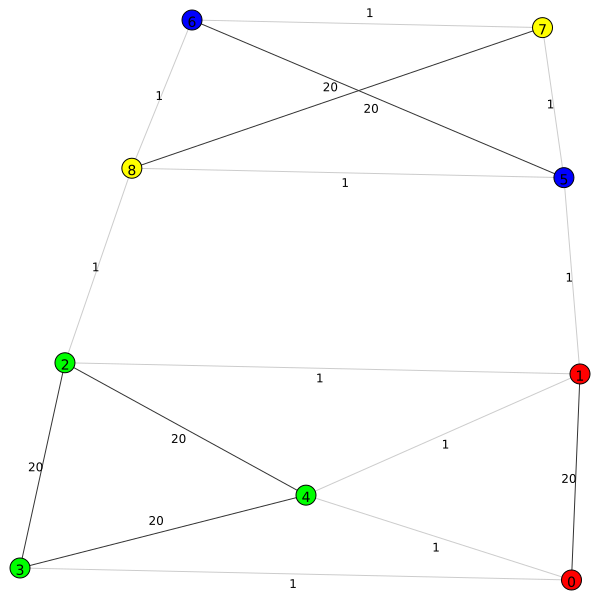

In [49]:
ig.plot(part)

In [ ]:
karate_tree = get_tree(karate_g)

In [ ]:
karate_tree

In [77]:
def nx_to_igraph(nx_g: nx.Graph) -> ig.Graph:
    nx_g = nx.convert_node_labels_to_integers(nx_g, label_attribute='old_label')
    old_label = nx.get_node_attributes(nx_g, 'old_label')
    
    
    weights = nx.get_edge_attributes(nx_g, name='weight')
    if len(weights) == 0:
        is_weighted = False
        edge_list = list(nx_g.edges())
    else:
        is_weighted = True
        edge_list = [(u, v, w) for (u, v), w in weights.items()]

    is_directed = nx_g.is_directed()
    ig_g = ig.Graph.TupleList(edges=edge_list, directed=is_directed, 
                              weights=is_weighted)
    
    for v in ig_g.vs:
        v['name'] = str(old_label[v.index])  # store the original labels in the name attribute
        v['label'] = str(v['name'])
    
    return ig_g

In [56]:
ig.Graph.TupleList?

Signature:
ig.Graph.TupleList(
    edges,
    directed=False,
    vertex_name_attr='name',
    edge_attrs=None,
    weights=False,
)
Docstring:
Constructs a graph from a list-of-tuples representation.

This representation assumes that the edges of the graph are encoded
in a list of tuples (or lists). Each item in the list must have at least
two elements, which specify the source and the target vertices of the edge.
The remaining elements (if any) specify the edge attributes of that edge,
where the names of the edge attributes originate from the C{edge_attrs}
list. The names of the vertices will be stored in the vertex attribute
given by C{vertex_name_attr}.

The default parameters of this function are suitable for creating
unweighted graphs from lists where each item contains the source vertex
and the target vertex. If you have a weighted graph, you can use items
where the third item contains the weight of the edge by setting
C{edge_attrs} to C{"weight"} or C{["weight"]}. If you have e

In [68]:
def assign_weights(nx_g: nx.Graph):
    jacc = {(u, v): p
        for u, v, p in nx.jaccard_coefficient(nx_g, ebunch=nx_g.edges())}
    nx.set_edge_attributes(nx_g, name='weight', values=jacc)
    return

In [78]:
g = nx.karate_club_graph()
# assign_weights(nx_g=g)
ig_g = nx_to_igraph(nx_g=g)

False [(0, 1), (0, 2), (0, 3), (0, 4)]


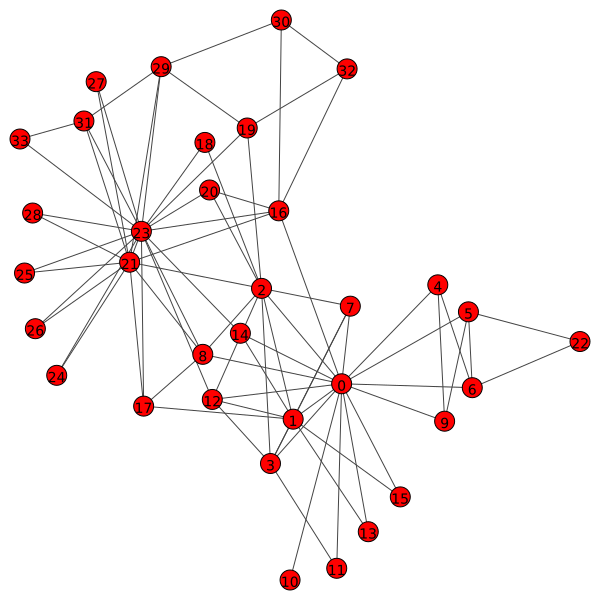

In [79]:
ig.plot(ig_g)

In [80]:
g_wt = nx.karate_club_graph()
assign_weights(g_wt)
ig_g_wt = nx_to_igraph(g_wt)

True [(0, 1, 0.3888888888888889), (0, 2, 0.23809523809523808), (0, 3, 0.29411764705882354), (0, 4, 0.11764705882352941)]


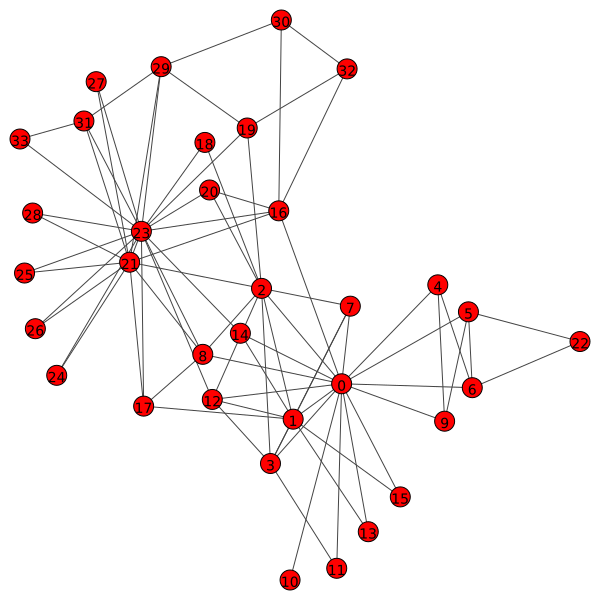

In [81]:
ig.plot(ig_g_wt)

In [82]:
print(ig_g_wt.vs['label'])

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33']


In [83]:
print(ig_g_wt.es['weight'])

[0.3888888888888889, 0.23809523809523808, 0.29411764705882354, 0.11764705882352941, 0.1111111111111111, 0.1111111111111111, 0.17647058823529413, 0.05, 0.11764705882352941, 0.0, 0.058823529411764705, 0.16666666666666666, 0.058823529411764705, 0.05555555555555555, 0.058823529411764705, 0.0, 0.26666666666666666, 0.36363636363636365, 0.3, 0.2727272727272727, 0.1, 0.09090909090909091, 0.1, 0.0, 0.3333333333333333, 0.2727272727272727, 0.15384615384615385, 0.0, 0.25, 0.0, 0.0, 0.047619047619047616, 0.42857142857142855, 0.14285714285714285, 0.375, 0.16666666666666666, 0.2, 0.3333333333333333, 0.16666666666666666, 0.2, 0.2, 0.2857142857142857, 0.21428571428571427, 0.1, 0.0, 0.0, 0.07692307692307693, 0.05555555555555555, 0.07692307692307693, 0.05555555555555555, 0.07692307692307693, 0.05555555555555555, 0.0, 0.07692307692307693, 0.05555555555555555, 0.07692307692307693, 0.05555555555555555, 0.0, 0.125, 0.2857142857142857, 0.13333333333333333, 0.15789473684210525, 0.2, 0.0, 0.125, 0.125, 0.2, 0.0

In [88]:
for e in ig_g_wt.es:
    e['width'] = e['weight'] + 0.1

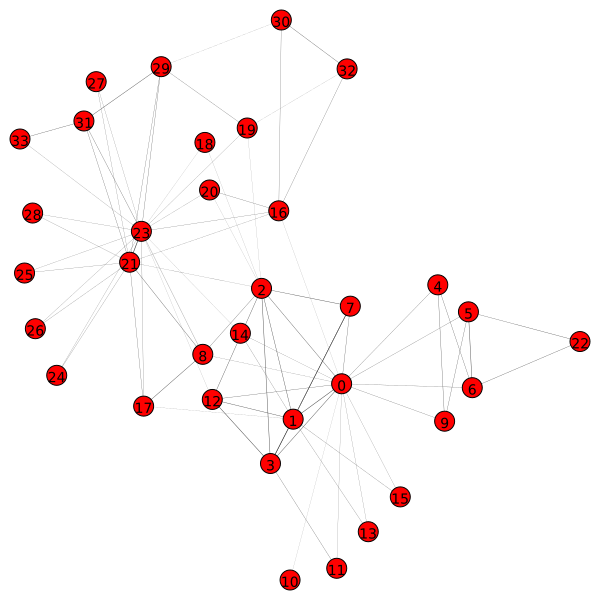

In [89]:
ig.plot(ig_g_wt)

In [97]:
part = ig_g.community_multilevel?

Signature: ig_g.community_multilevel(weights=None, return_levels=False)
Docstring:
Community structure based on the multilevel algorithm of
Blondel et al.

This is a bottom-up algorithm: initially every vertex belongs to a
separate community, and vertices are moved between communities
iteratively in a way that maximizes the vertices' local contribution
to the overall modularity score. When a consensus is reached (i.e. no
single move would increase the modularity score), every community in
the original graph is shrank to a single vertex (while keeping the
total weight of the adjacent edges) and the process continues on the
next level. The algorithm stops when it is not possible to increase
the modularity any more after shrinking the communities to vertices.

This algorithm is said to run almost in linear time on sparse graphs.

@param weights: edge attribute name or a list containing edge
  weights
@param return_levels: if C{True}, the communities at each level are
  returned in a list.

In [ ]:
part = ig_g.community_multilevel

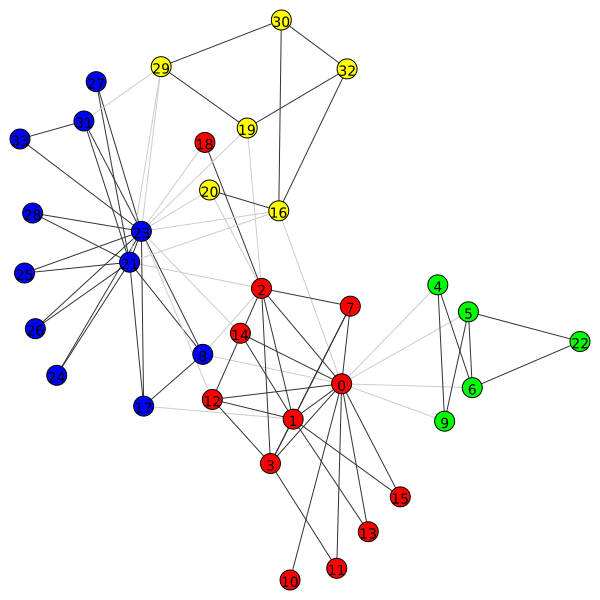

In [96]:
ig.plot(part)